In [200]:
!pip install xgboost



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
# Leer todas las hojas del Excel
archivo_excel = "trx_recaudacion_km_empresa_54_2020_2025.xlsx"
hojas = pd.read_excel(archivo_excel, sheet_name=None)

# Lista para guardar los DataFrames transformados
df_lista = []

for nombre_hoja, df in hojas.items():
    df['LINEA'] = nombre_hoja.strip()  # agregar nombre de hoja como línea
    df_lista.append(df)

# Unir todos los DataFrames
df_final = pd.concat(df_lista, ignore_index=True)

# Reordenar columnas
columnas = ['FECHA', 'LINEA', 'CANT. TRX', 'RECAUDACION', 'KM']
df_final = df_final[columnas]

In [203]:
df_final

,FECHA,LINEA,CANT. TRX,RECAUDACION,KM
0,2020-01-01,166,9121.0,142707.83,8350.738
1,2020-01-02,166,34135.0,493514.22,15555.049
2,2020-01-03,166,37207.0,535227.08,15866.048
3,2020-01-04,166,31732.0,470262.62,16829.046
4,2020-01-05,166,22091.0,329308.39,12240.411
...,...,...,...,...,...
17896,2025-06-07,504I,336.0,127582.38,650.192
17897,2025-06-08,504I,204.0,75651.72,668.249
17898,2025-06-09,504I,967.0,320191.52,946.772
17899,2025-06-10,504I,926.0,289751.48,927.829


In [204]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17901 entries, 0 to 17900
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        17901 non-null  datetime64[ns]
 1   LINEA        17901 non-null  object        
 2   CANT. TRX    17780 non-null  float64       
 3   RECAUDACION  17780 non-null  float64       
 4   KM           17794 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 699.4+ KB


In [205]:
df = df_final.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17780 entries, 0 to 17900
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        17780 non-null  datetime64[ns]
 1   LINEA        17780 non-null  object        
 2   CANT. TRX    17780 non-null  float64       
 3   RECAUDACION  17780 non-null  float64       
 4   KM           17780 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 833.4+ KB


In [206]:
['FECHA', 'LINEA', 'CANT. TRX', 'RECAUDACION', 'KM']
# Suponiendo que ya tenés el dataframe
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Día de la semana (0=lunes, 6=domingo)
df['weekday'] = df['FECHA'].dt.weekday

df['nombre_dia'] = df['FECHA'].dt.day_name()

#aseguro el orden correcto de los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['nombre_dia'] = pd.Categorical(df['nombre_dia'], categories=dias_ordenados, ordered=True)

# Mes (1-12)
df['month'] = df['FECHA'].dt.month

df['nombre_mes'] = df['FECHA'].dt.month_name()

# Para asegurar el orden correcto
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
df['nombre_mes'] = pd.Categorical(df['nombre_mes'], categories=meses_ordenados, ordered=True)

# Variables cíclicas
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)



C:\Users\mbernardo\AppData\Local\Temp\ipykernel_12100\837124473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FECHA'] = pd.to_datetime(df['FECHA'])
C:\Users\mbernardo\AppData\Local\Temp\ipykernel_12100\837124473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['FECHA'].dt.weekday
C:\Users\mbernardo\AppData\Local\Temp\ipykernel_12100\837124473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

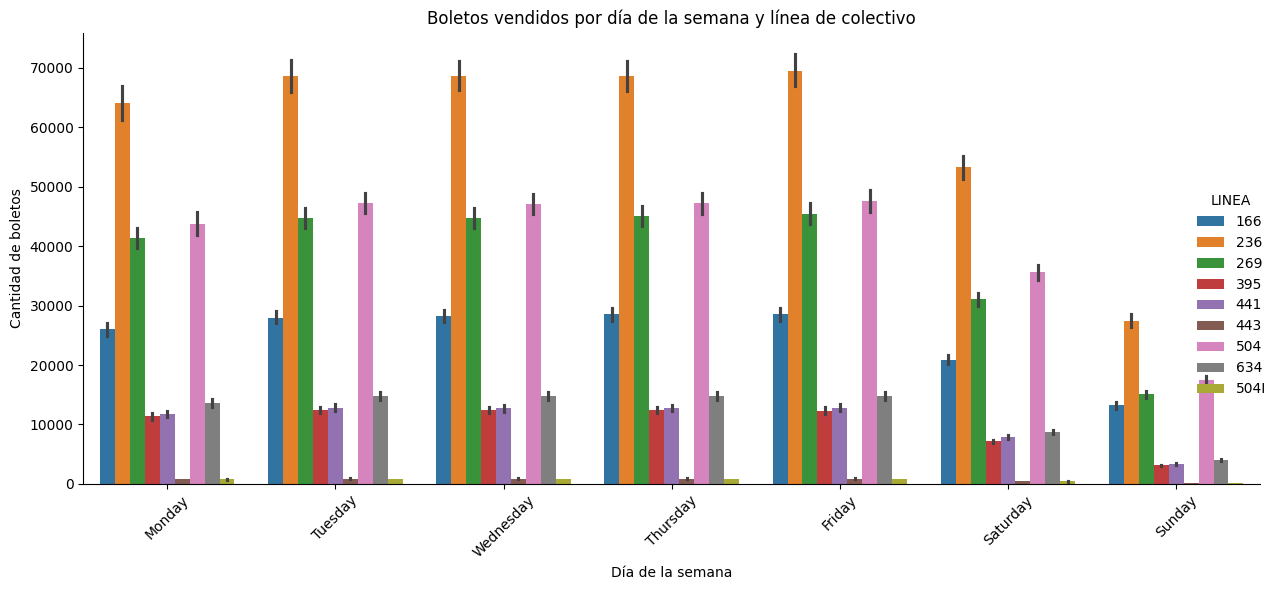

In [207]:
sns.catplot(
    data=df,
    kind="bar",
    x="nombre_dia",
    y='CANT. TRX',
    hue="LINEA",
    height=6,
    aspect=2
)

plt.title("Boletos vendidos por día de la semana y línea de colectivo")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de boletos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

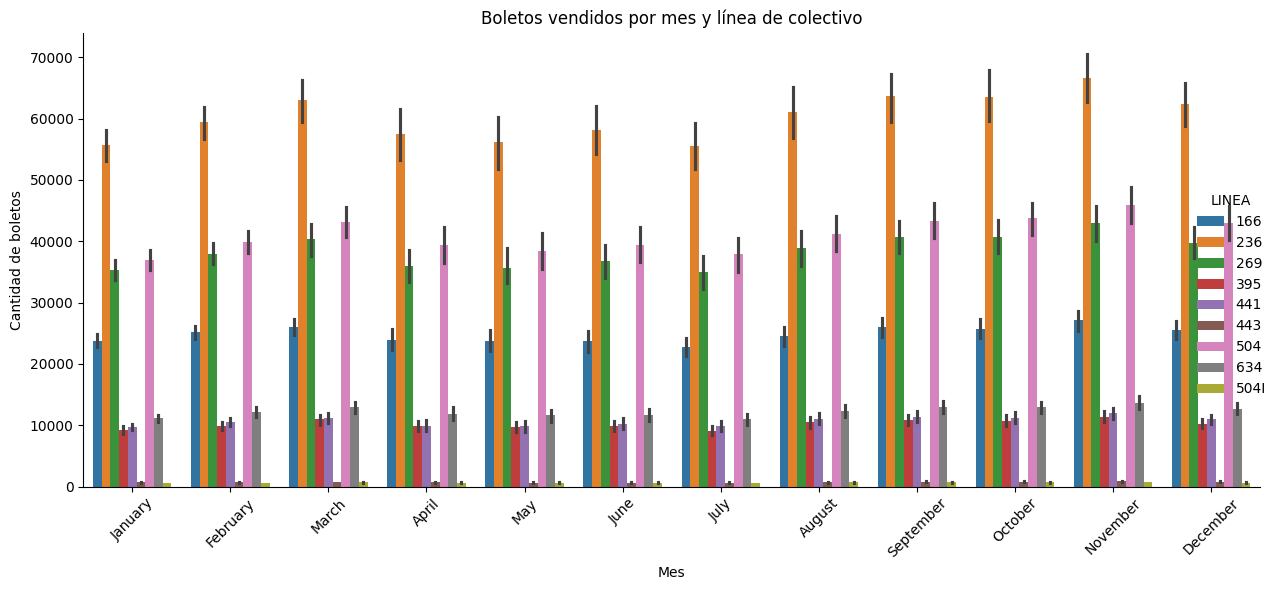

In [208]:

sns.catplot(
    data=df,
    kind="bar",
    x="nombre_mes",
    y='CANT. TRX',
    hue='LINEA',
    height=6,
    aspect=2
)

plt.title("Boletos vendidos por mes y línea de colectivo")
plt.xlabel("Mes")
plt.ylabel("Cantidad de boletos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\mbernardo\AppData\Local\Temp\ipykernel_12100\1030630302.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(['nombre_mes', 'nombre_dia'])['CANT. TRX'].sum().unstack()


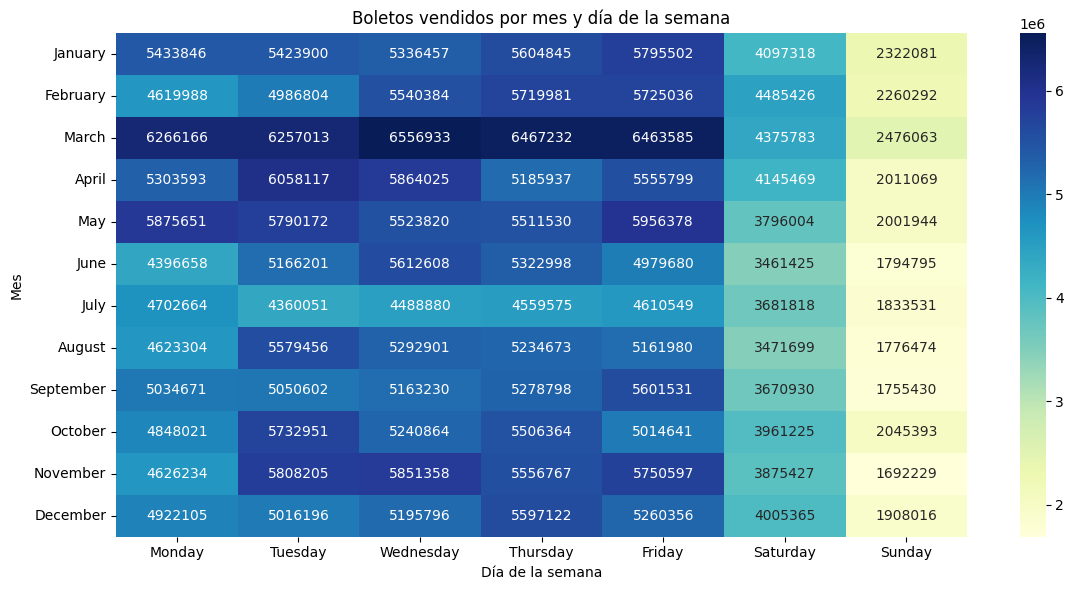

In [209]:
tabla = df.groupby(['nombre_mes', 'nombre_dia'])['CANT. TRX'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(tabla, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Boletos vendidos por mes y día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()

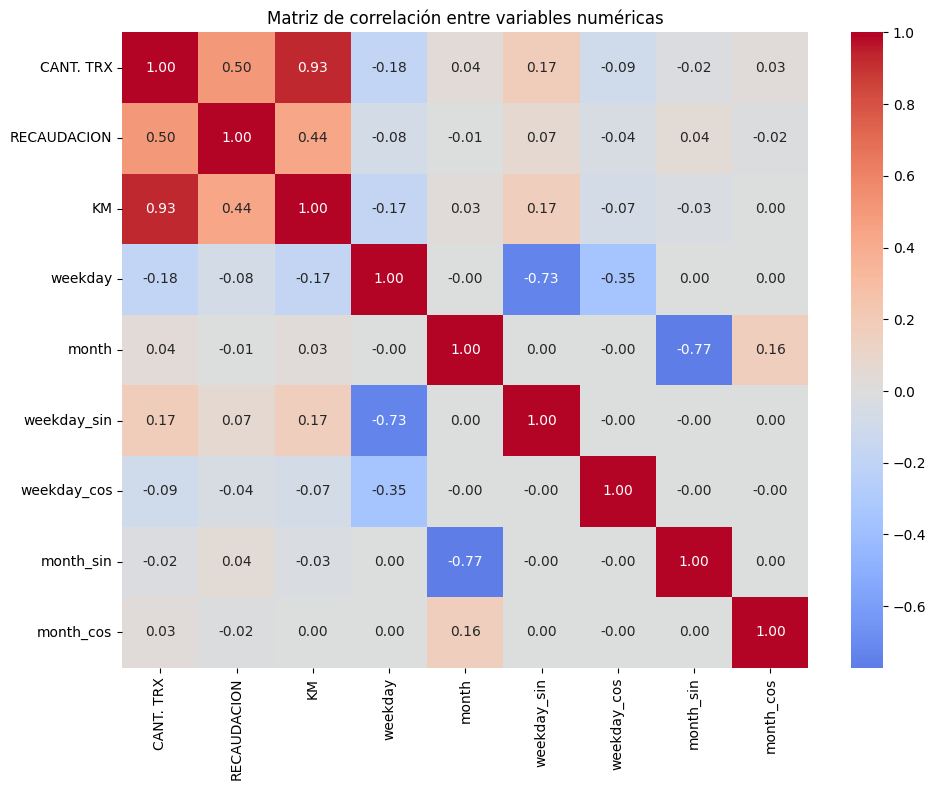

In [210]:
correlaciones = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

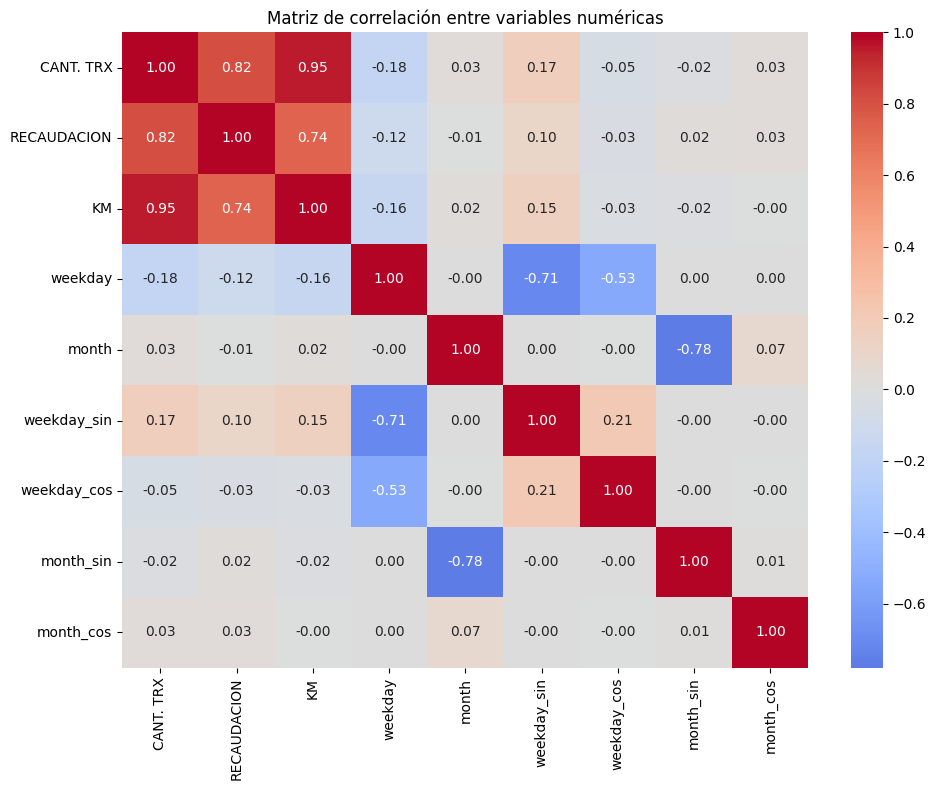

In [211]:
correlaciones = df.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

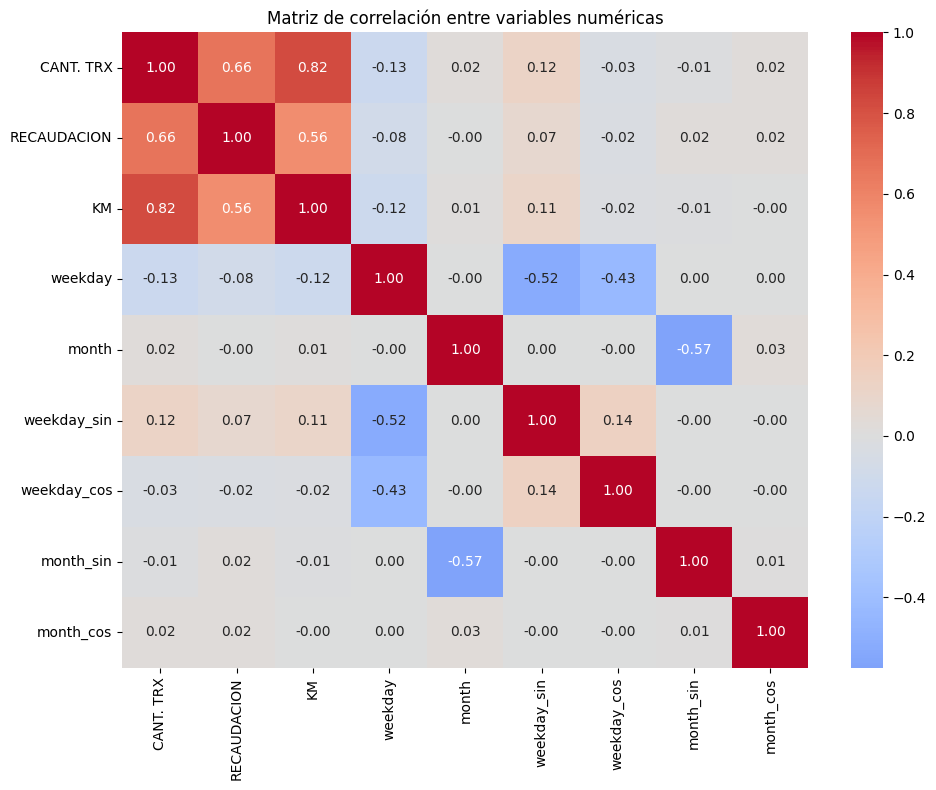

In [212]:
correlaciones = df.corr(method='kendall', numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

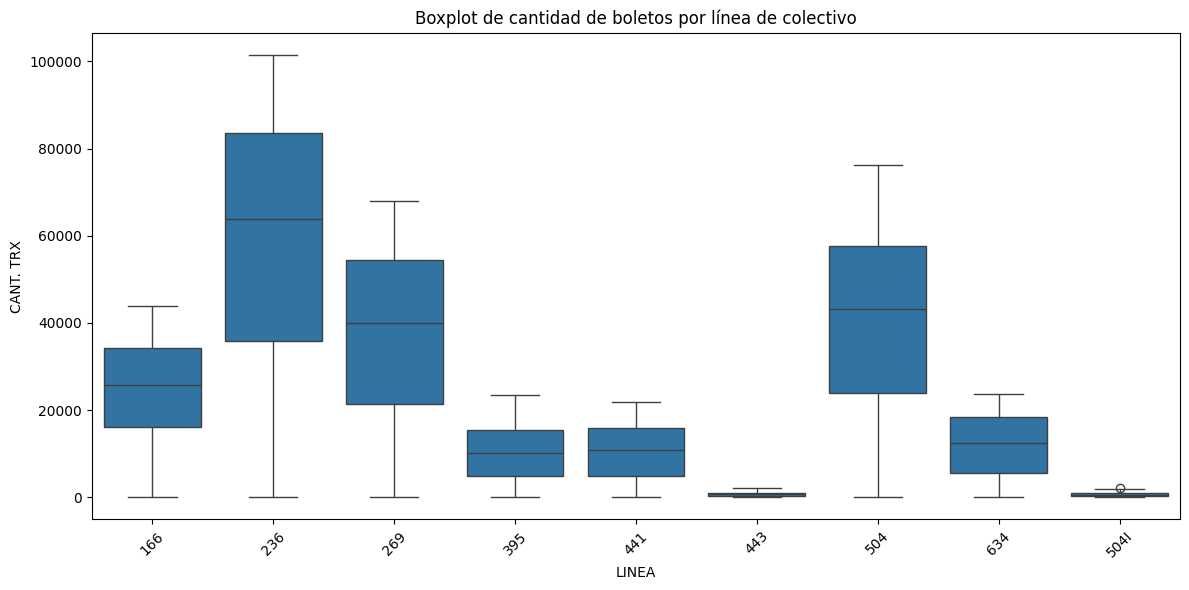

In [213]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='LINEA', y='CANT. TRX', data=df)
plt.title("Boxplot de cantidad de boletos por línea de colectivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [214]:

# aplica one-hot encoding a la columna 'LINEA'
df = pd.get_dummies(df, columns=['LINEA'], drop_first=True)

## Entrenamiento del modelo

In [215]:
X = df.drop(columns=['FECHA', 'CANT. TRX', 'nombre_dia', 'nombre_mes', 'weekday', 'month', ])  # Eliminar columnas no predictoras
y = df['CANT. TRX']

In [216]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [217]:
from sklearn.preprocessing import StandardScaler

columnas = ['RECAUDACION', 'KM']

scaler = StandardScaler()
# Entreno el scaler con los datos de entrenamiento
X_train[columnas] = scaler.fit_transform(X_train[columnas])

#transformo los datos de test con el scaler entrenado
X_test[columnas] = scaler.transform(X_test[columnas])

In [218]:
X_train.head()

,RECAUDACION,KM,weekday_sin,weekday_cos,month_sin,month_cos,LINEA_236,LINEA_269,LINEA_395,LINEA_441,LINEA_443,LINEA_504,LINEA_504I,LINEA_634
3927,6.096025,2.294635,0.781831,0.623490,0.866025,-0.500000,True,False,False,False,False,False,False,False
7120,-0.378097,-0.520203,0.000000,1.000000,0.866025,0.500000,False,False,True,False,False,False,False,False
10267,-0.453555,-1.062282,0.974928,-0.222521,-0.500000,0.866025,False,False,False,False,True,False,False,False
14425,-0.424047,-0.266933,0.000000,1.000000,0.500000,-0.866025,False,False,False,False,False,False,False,True
13323,-0.051256,0.556946,-0.974928,-0.222521,-0.866025,0.500000,False,False,False,False,False,True,False,False


In [219]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [220]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("MAPE:", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

R²: 0.9061539811086057
MAE: 4429.563654521997
MSE: 47857041.7385215
RMSE: 6917.878413106254
MAPE: 204.3534915975327


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()

grid = GridSearchCV(forest_model,
                    [{"max_depth": [i+1 for i in range(50)]}],
                    refit=True,
                    cv=5,
                    scoring='r2',
                    n_jobs=-1,     # usa todos los cores disponibles
                    verbose=2      # para ver progre
                    )

resultGS = grid.fit(X_train, y_train)
#Recogemos los resultados
print('Best Score: %s' % resultGS.best_score_)
print('Best Hyperparameters: %s' % resultGS.best_params_)

forest_model = grid.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Score: 0.9908431577511622
Best Hyperparameters: {'max_depth': 10}


In [223]:
y_pred = forest_model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("MAPE:", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

R²: 0.9913911465362852
MAE: 1040.6527642548854
MSE: 4390109.078687777
RMSE: 2095.258714022633
MAPE: 8.708680657348584


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()

grid = GridSearchCV(tree_model,
                    [{"max_depth": [i+1 for i in range(20)]}],
                    refit=True,
                    cv=5,
                    scoring='r2',
                    n_jobs=-1,     # usa todos los cores disponibles
                    verbose=2      # para ver progre
                    )

resultGS = grid.fit(X_train, y_train)
#Recogemos los resultados
print('Best Score: %s' % resultGS.best_score_)
print('Best Hyperparameters: %s' % resultGS.best_params_)

tree_model = grid.best_estimator_


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Score: 0.9685456110858439
Best Hyperparameters: {'max_depth': 5}


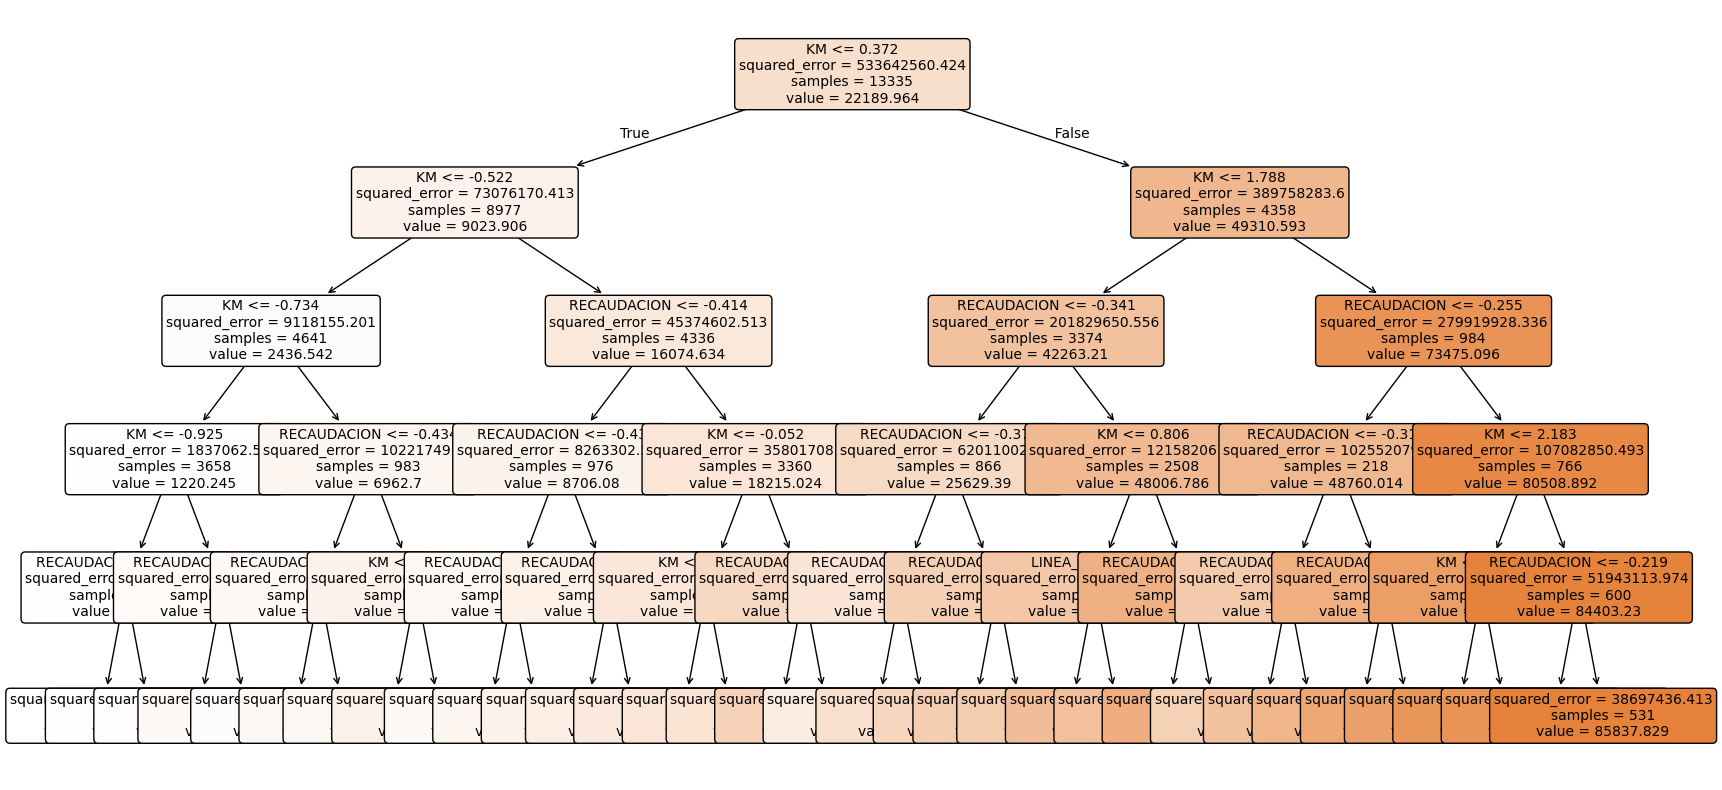

In [227]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()

In [228]:
y_pred = tree_model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("MAPE:", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

R²: 0.9711637426129767
MAE: 2212.511140765848
MSE: 14705130.698730905
RMSE: 3834.7269392658072
MAPE: 42.022110423948924


In [ ]:
import xgboost as xgb

xgb_modelo = xgb.XGBRegressor(learning_rate=0.1, random_state=42)


grid = GridSearchCV(xgb_modelo,
                    [{"n_estimators": [i+1 for i in range(0, 50,5)], "max_depth": [i+1 for i in range(4,50,1)]}],
                    refit=True,
                    cv=5,
                    scoring='r2')

resultGS = grid.fit(X_train, y_train)
#Recogemos los resultados
print('Best Score: %s' % resultGS.best_score_)
print('Best Hyperparameters: %s' % resultGS.best_params_)

xgb_modelo = grid.best_estimator_


Best Score: 0.9893427831055923
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 30}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_modelo.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("MAPE:", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

R²: -0.9392556898018085
MAE: 21874.493513858655
MSE: 988928902.7370865
RMSE: 31447.239986000146
MAPE: 110.90500520164983


In [ ]:
from sklearn.svm import SVR

svm_hitters = SVR()

grid = GridSearchCV(svm_hitters,
                    [{"C": [0.01, 0.1, 1, 5, 10, 100], "kernel": ["linear"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "gamma": [0.1, 0.5, 1, 2, 10, 100], "kernel": ["rbf", "sigmoid"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "degree": [2, 3, 4, 5, 6], "kernel": ["poly"]}],
                    refit=True,
                    cv=5,
                    scoring='neg_mean_absolute_error')
resultadosSVR = grid.fit(X_train,y_train)
#Recogemos los resultados
print('Best Score: %s' % resultadosSVR.best_score_)
print('Best Hyperparameters: %s' % resultadosSVR.best_params_)

svm_hitters = grid.best_estimator_

In [ ]:
y_pred = svm_hitters.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("MAPE:", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)